<a href="https://colab.research.google.com/github/changhorang/SSAC_study/blob/main/DL/05_DNN_note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
mpl.rcParams['font.family'] = 'malgun gothic'
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['axes.titlesize'] = 20

In [ ]:
np.random.seed(0)
tf.random.set_seed(0)

## 학습 결과 시각화 함수

In [ ]:
def plot_loss(epochs, history):
  """
  학습 loss 시각화 하는 함수
  """
  plt.figure(figsize=(8, 7))
  plt.plot(range(1, epochs+1), history.history['loss'], label='train loss')
  plt.plot(range(1, epochs+1), history.history['val_loss'], label='validataion loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [ ]:
def plot_accuracy(epochs, history):
  """
  학습 accuracy 시각화 하는 함수
  """
  plt.figure(figsize=(8, 7))
  plt.plot(range(1, epochs+1), history.history['accuracy'], label='train accuracy')
  plt.plot(range(1, epochs+1), history.history['val_accuracy'], label='validataion accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

## 데이터 로딩

In [ ]:
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
train_image.shape, test_image.shape

((60000, 28, 28), (10000, 28, 28))

## 하이퍼파라미터 변수 정의

In [ ]:
lr = 1e-3
epochs = 20
batchs = 100

# data num
n_train = train_image.shape[0]
n_test = test_image.shape[0]

## 전처리
- image : 0 ~ 1 사이의 값으로 정규화
- label : one hot encoding (다중분류 문제이므로)

In [ ]:
X_train = (train_image/255.).astype('float32')
X_test = (test_image/255.).astype('float32')

In [ ]:
y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

In [ ]:
# check
np.min(X_train), np.max(X_train), np.min(X_test), np.max(X_test)

(0.0, 1.0, 0.0, 1.0)

In [ ]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

## Dataset 생성

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(n_train).batch(batchs)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batchs)

## 모델의 크기 변경

In [ ]:
# 작은 모델
def create_small_model():
  # create model
  model = keras.Sequential()

  # hidden layer
  model.add(layers.Flatten(input_shape=(28, 28)))
  model.add(layers.Dense(8, activation='relu'))

  # output layer
  model.add(layers.Dense(10, activation='softmax'))
  
  return model

In [ ]:
# model 생성 & 컴파일
small_model = create_small_model()
small_model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [ ]:
small_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 8)                 6280      
                                                                 
 dense_1 (Dense)             (None, 10)                90        
                                                                 
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


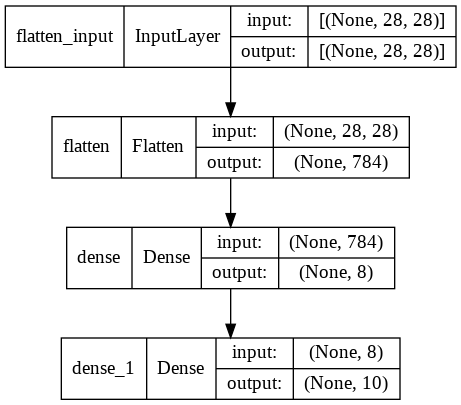

In [ ]:
keras.utils.plot_model(small_model, show_shapes=True)

In [ ]:
hist = small_model.fit(train_dataset, epochs=epochs, validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.9574 - accuracy: 0.7075 - val_loss: 0.5000 - val_accuracy: 0.8568
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.4212 - accuracy: 0.8781 - val_loss: 0.3574 - val_accuracy: 0.8926
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.3443 - accuracy: 0.9003 - val_loss: 0.3258 - val_accuracy: 0.9027
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.3187 - accuracy: 0.9073 - val_loss: 0.3089 - val_accuracy: 0.9079
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.3032 - accuracy: 0.9115 - val_loss: 0.2987 - val_accuracy: 0.9122
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2922 - accuracy: 0.9154 - val_loss: 0.2926 - val_accuracy: 0.9159
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2840 - accuracy: 0.9179 - val_loss: 0.2845 - val_accuracy: 0.9166
Epoch 

findfont: Font family ['malgun gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['malgun gothic'] not found. Falling back to DejaVu Sans.


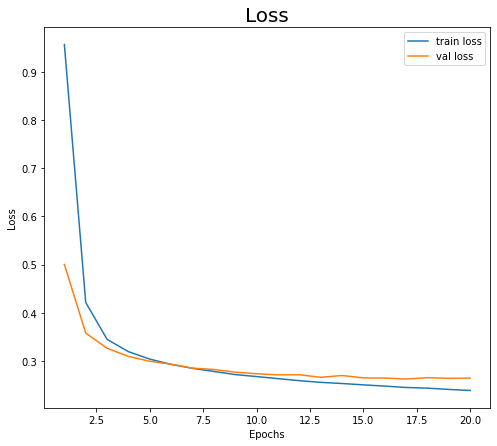

In [ ]:
plot_loss(epochs, hist)

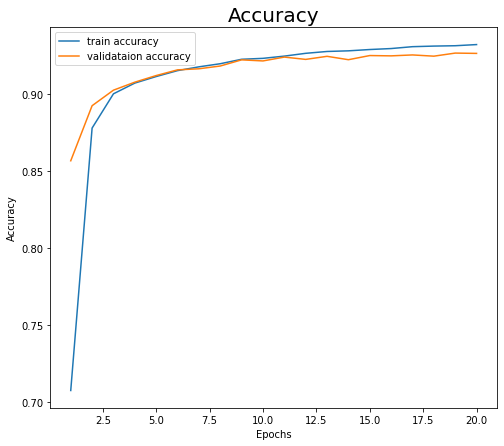

In [ ]:
plot_accuracy(epochs, hist)

In [ ]:
# 모델의 크기를 크게
# MLP - unit 개수 : 2제곱, 큰값에서 점점 줄여나간다
def create_bigger_model():
  model = keras.Sequential()
  model.add(layers.Flatten(input_shape=(28, 28)))
  
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(128, activation='relu'))
  
  model.add(layers.Dense(10, activation='softmax'))
  return model


In [ ]:
bigger_model = create_bigger_model()
bigger_model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])
bigger_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 317,450
Trainable params: 317,450
Non-tr

In [ ]:
hist = bigger_model.fit(train_dataset, epochs=epochs, validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 5s 7ms/step - loss: 0.2485 - accuracy: 0.9253 - val_loss: 0.1205 - val_accuracy: 0.9631
Epoch 2/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0931 - accuracy: 0.9711 - val_loss: 0.0854 - val_accuracy: 0.9739
Epoch 3/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0636 - accuracy: 0.9799 - val_loss: 0.0732 - val_accuracy: 0.9772
Epoch 4/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0480 - accuracy: 0.9845 - val_loss: 0.0831 - val_accuracy: 0.9751
Epoch 5/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0385 - accuracy: 0.9878 - val_loss: 0.0904 - val_accuracy: 0.9742
Epoch 6/20
600/600 [==============================] - 5s 7ms/step - loss: 0.0328 - accuracy: 0.9896 - val_loss: 0.0788 - val_accuracy: 0.9790
Epoch 7/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0281 - accuracy: 0.9908 - val_loss: 0.0786 - val_accuracy: 0.9787
Epoch 

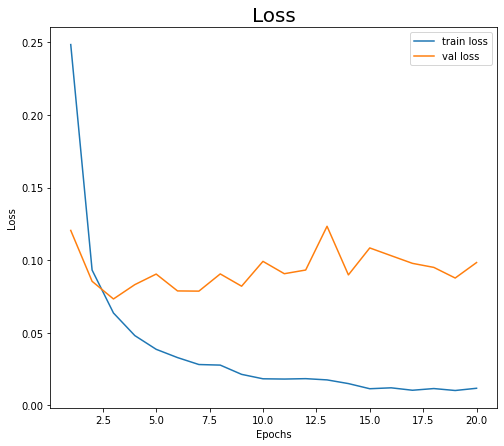

In [ ]:
plot_loss(epochs, hist)

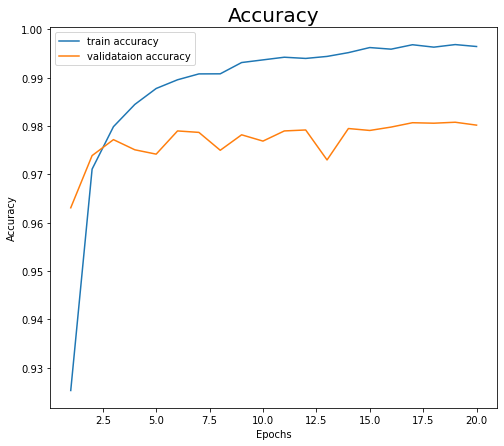

In [ ]:
plot_accuracy(epochs, hist)

## Dropout 적용
- layers.Dropout 객체를 이용
- dropout rate는 0.2 ~ 0.5 정도로 설정
- dropout node를 가질 Layer 앞에 추가
- 학습 시킬 파라미터는 없음

In [ ]:
def create_dropout_model():
  model = keras.Sequential()
  model.add(layers.Flatten(input_shape=(28, 28)))
  
  model.add(layers.Dropout(0.5)) # 다음 레이어의 노드들중 일부를 dropout 시킨다
  model.add(layers.Dense(256, activation='relu'))
  
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(256, activation='relu'))

  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(128, activation='relu'))

  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(128, activation='relu'))
  
  model.add(layers.Dense(10, activation='softmax'))
  return model

In [ ]:
dropout_model = create_dropout_model()
dropout_model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])
dropout_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dropout_4 (Dropout)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               65792     
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [ ]:
hist = dropout_model.fit(train_dataset, epochs=epochs, validation_data=test_dataset)
# loss가 train보다 val 쪽이 낮음은 overfitting 해소를 의미함

Epoch 1/20
600/600 [==============================] - 6s 10ms/step - loss: 0.7571 - accuracy: 0.7508 - val_loss: 0.2170 - val_accuracy: 0.9384
Epoch 2/20
600/600 [==============================] - 5s 9ms/step - loss: 0.4067 - accuracy: 0.8773 - val_loss: 0.1665 - val_accuracy: 0.9519
Epoch 3/20
600/600 [==============================] - 6s 9ms/step - loss: 0.3430 - accuracy: 0.8972 - val_loss: 0.1411 - val_accuracy: 0.9587
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.3062 - accuracy: 0.9076 - val_loss: 0.1315 - val_accuracy: 0.9632
Epoch 5/20
600/600 [==============================] - 5s 8ms/step - loss: 0.2794 - accuracy: 0.9155 - val_loss: 0.1172 - val_accuracy: 0.9672
Epoch 6/20
600/600 [==============================] - 5s 8ms/step - loss: 0.2612 - accuracy: 0.9211 - val_loss: 0.1142 - val_accuracy: 0.9664
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 0.2506 - accuracy: 0.9247 - val_loss: 0.1076 - val_accuracy: 0.9687
Epoch

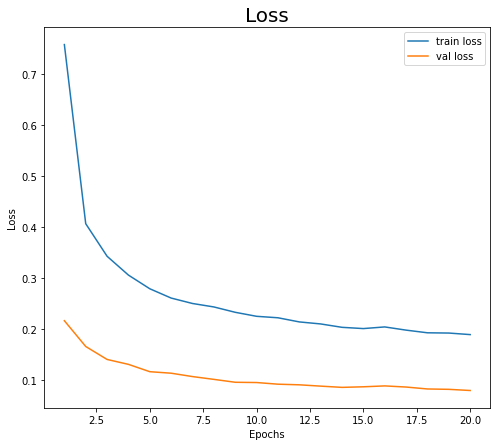

In [ ]:
plot_loss(epochs, hist)

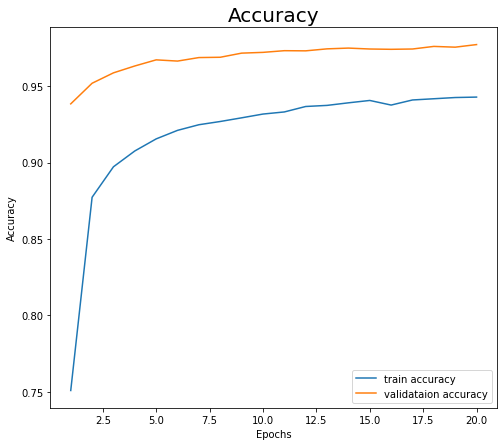

In [ ]:
plot_accuracy(epochs, hist)

## Batch Normalization
- Dense -> BN -> Activation func. 순서로 적용
- layers.BatchNormalization 사용

In [ ]:
def create_bn_model():
  model = keras.Sequential()
  model.add(layers.Flatten(input_shape=(28, 28)))

  model.add(layers.Dense(256)) # unit만 지정 / activation 생략
  model.add(layers.BatchNormalization()) # BN
  model.add(layers.ReLU()) # activation func.

  # model.add(layers.Dropout(0.5))
  model.add(layers.Dense(128))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())

  model.add(layers.Dense(10))
  model.add(layers.BatchNormalization())
  model.add(layers.Softmax())

  # 참고 'sigmoid'(이진분류 케이스)는 layers.Activation(activation='sigmoid') 를 이용

  return model

In [ ]:
bn_model = create_bn_model()
bn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])
bn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 256)               200960    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                      

In [ ]:
hist = bn_model.fit(train_dataset, epochs=epochs, validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 5s 7ms/step - loss: 0.4147 - accuracy: 0.9372 - val_loss: 0.2074 - val_accuracy: 0.9702
Epoch 2/20
600/600 [==============================] - 4s 6ms/step - loss: 0.1816 - accuracy: 0.9734 - val_loss: 0.1240 - val_accuracy: 0.9762
Epoch 3/20
600/600 [==============================] - 4s 6ms/step - loss: 0.1134 - accuracy: 0.9820 - val_loss: 0.1036 - val_accuracy: 0.9788
Epoch 4/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0792 - accuracy: 0.9870 - val_loss: 0.0795 - val_accuracy: 0.9802
Epoch 5/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0588 - accuracy: 0.9900 - val_loss: 0.0701 - val_accuracy: 0.9819
Epoch 6/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0454 - accuracy: 0.9922 - val_loss: 0.0608 - val_accuracy: 0.9824
Epoch 7/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0357 - accuracy: 0.9935 - val_loss: 0.0596 - val_accuracy: 0.9830
Epoch 

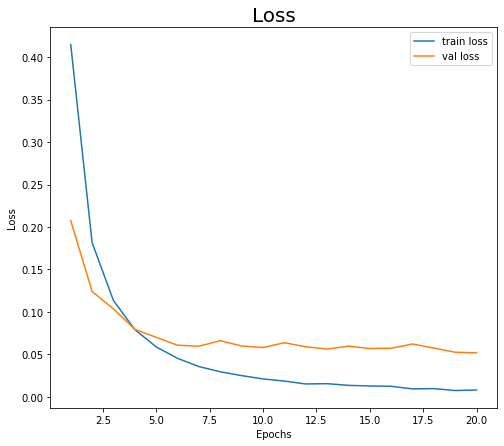

In [ ]:
plot_loss(epochs, hist)

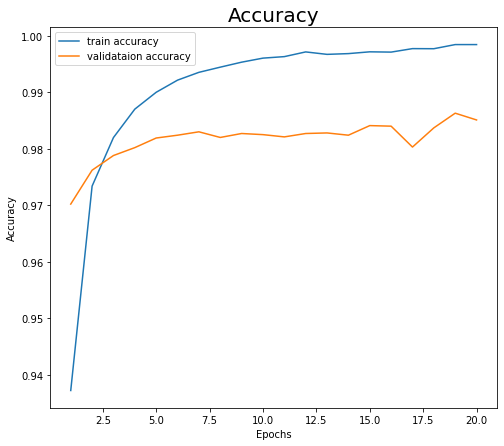

In [ ]:
plot_accuracy(epochs, hist)

## Learning rate 조정을 이용한 성능 향상

### Learning Rate Decay
- 일정한 step 마다 learning rate를 조정

In [ ]:
def create_model():
  model = keras.Sequential()
  model.add(layers.Flatten(input_shape=(28, 28)))
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  return model

In [ ]:
model = create_model()

In [ ]:
len(train_dataset)

600

In [ ]:
# optimizer의 learning_rate를 상수 대신 LearningRate scheduler 객체로 설정
# ExponentialDecay - 일정한 간격(step기준)마다 lr을 변경
lr_scheduler = keras.optimizers.schedules.ExponentialDecay(
                    initial_learning_rate=lr, # start lr
                    decay_steps=len(train_dataset)*5, # 몇 step마다 변경할 지 (5 epoch마다 변경)
                    decay_rate=0.5, # 변화율 (decay_rate 값을 현재 lr에 곱해줌)
                    staircase=True, # lr값이 계단식으로 변화 (False인 경우 점진적으로 감소, 일반적으로 True)
                    )

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_scheduler),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(train_dataset, epochs=epochs, validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 5s 7ms/step - loss: 0.2553 - accuracy: 0.9255 - val_loss: 0.1161 - val_accuracy: 0.9634
Epoch 2/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0952 - accuracy: 0.9704 - val_loss: 0.1114 - val_accuracy: 0.9657
Epoch 3/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0641 - accuracy: 0.9803 - val_loss: 0.0993 - val_accuracy: 0.9682
Epoch 4/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0465 - accuracy: 0.9851 - val_loss: 0.0847 - val_accuracy: 0.9744
Epoch 5/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0351 - accuracy: 0.9886 - val_loss: 0.0723 - val_accuracy: 0.9798
Epoch 6/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0147 - accuracy: 0.9954 - val_loss: 0.0652 - val_accuracy: 0.9814
Epoch 7/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0090 - accuracy: 0.9974 - val_loss: 0.0666 - val_accuracy: 0.9826
Epoch 

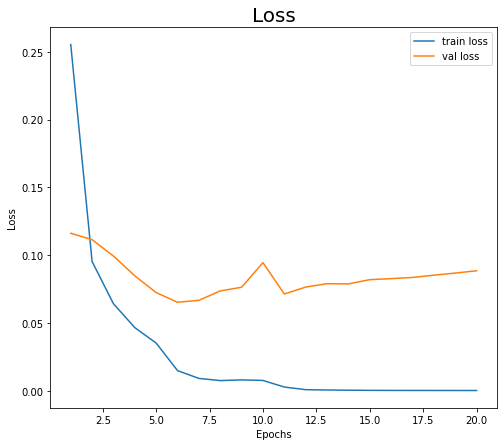

In [ ]:
plot_loss(epochs, hist)

### Callback을 이용한 학습률 조정
- ReduceLROnPlateau callback을 이용
  - 학습 시 성능이 개선이 안되는 경우 lr을 조정

In [ ]:
model = create_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

lr_cb = ReduceLROnPlateau(monitor='val_loss', # 성능개선과 관련해 볼 평가지표
                          factor=0.5, # lr 조정 비율 (현재 lr*factor)
                          patience=3, # 성능 개선이 안될 때, 몇 epoch까지 기다릴 지 지정 (general=10~)
                          mode='min', # monitor의 값이 어떨 때 성능 개선 되는지 (min=작을 수록, max=클수록, auto=자동으로)
                          verbose=2) # 학습률 변화시 로그 남기기

In [ ]:
hist = model.fit(train_dataset, epochs=epochs,
                 validation_data=test_dataset, callbacks=[lr_cb])
                                              # 학습 때 처리할 callback들 등록

Epoch 1/20
600/600 [==============================] - 4s 6ms/step - loss: 0.2514 - accuracy: 0.9244 - val_loss: 0.1208 - val_accuracy: 0.9642 - lr: 0.0010
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0959 - accuracy: 0.9705 - val_loss: 0.0927 - val_accuracy: 0.9696 - lr: 0.0010
Epoch 3/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0648 - accuracy: 0.9798 - val_loss: 0.0854 - val_accuracy: 0.9730 - lr: 0.0010
Epoch 4/20
600/600 [==============================] - 3s 6ms/step - loss: 0.0454 - accuracy: 0.9852 - val_loss: 0.0829 - val_accuracy: 0.9756 - lr: 0.0010
Epoch 5/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0357 - accuracy: 0.9884 - val_loss: 0.0761 - val_accuracy: 0.9785 - lr: 0.0010
Epoch 6/20
600/600 [==============================] - 3s 6ms/step - loss: 0.0293 - accuracy: 0.9904 - val_loss: 0.0731 - val_accuracy: 0.9800 - lr: 0.0010
Epoch 7/20
600/600 [==============================] - 3s 6ms/step - lo

## MNIST 예측 모델 네트워크 정의 및 성능 개선

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
tf.random.set_seed(0)

(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()

In [ ]:
train_image.shape, test_image.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
epochs = 80
batchs = 100
lr = 1e-3

n_train = train_image.shape[0]
n_test = test_image.shape[0]

In [ ]:
X_train = (train_image/255.).astype('float32')
X_test = (test_image/255.).astype('float32')

y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(n_train).batch(batchs)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batchs)

In [ ]:
def mnist_model():
  model = keras.Sequential()

  model.add(layers.Flatten(input_shape=(28, 28)))
  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(1024))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())

  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(512))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())

  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(128))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())

  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(32))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())

  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(10))
  model.add(layers.BatchNormalization())
  model.add(layers.Softmax())

  return model

In [ ]:
model = mnist_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dropout_28 (Dropout)        (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 1024)              803840    
                                                                 
 batch_normalization_28 (Bat  (None, 1024)             4096      
 chNormalization)                                                
                                                                 
 re_lu_22 (ReLU)             (None, 1024)              0         
                                                                 
 dropout_29 (Dropout)        (None, 1024)              0         
                                                      

In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

lr_cb2 = ReduceLROnPlateau(monitor='val_loss', # 성능개선과 관련해 볼 평가지표
                          factor=0.5, # lr 조정 비율 (현재 lr*factor)
                          patience=5, # 성능 개선이 안될 때, 몇 epoch까지 기다릴 지 지정 (general=10~)
                          mode='min', # monitor의 값이 어떨 때 성능 개선 되는지 (min=작을 수록, max=클수록, auto=자동으로)
                          verbose=2) # 학습률 변화시 로그 남기기

In [ ]:
hist = model.fit(train_dataset, epochs=epochs, validation_data=test_dataset, callbacks=[lr_cb2])

Epoch 1/80
600/600 [==============================] - 4s 6ms/step - loss: 0.2017 - accuracy: 0.9522 - val_loss: 0.0732 - val_accuracy: 0.9793 - lr: 0.0010
Epoch 2/80
600/600 [==============================] - 4s 6ms/step - loss: 0.1837 - accuracy: 0.9561 - val_loss: 0.0725 - val_accuracy: 0.9782 - lr: 0.0010
Epoch 3/80
600/600 [==============================] - 4s 6ms/step - loss: 0.1711 - accuracy: 0.9593 - val_loss: 0.0676 - val_accuracy: 0.9811 - lr: 0.0010
Epoch 4/80
600/600 [==============================] - 4s 6ms/step - loss: 0.1582 - accuracy: 0.9627 - val_loss: 0.0676 - val_accuracy: 0.9806 - lr: 0.0010
Epoch 5/80
600/600 [==============================] - 4s 6ms/step - loss: 0.1531 - accuracy: 0.9631 - val_loss: 0.0642 - val_accuracy: 0.9820 - lr: 0.0010
Epoch 6/80
600/600 [==============================] - 4s 6ms/step - loss: 0.1413 - accuracy: 0.9660 - val_loss: 0.0611 - val_accuracy: 0.9818 - lr: 0.0010
Epoch 7/80
600/600 [==============================] - 4s 6ms/step - lo

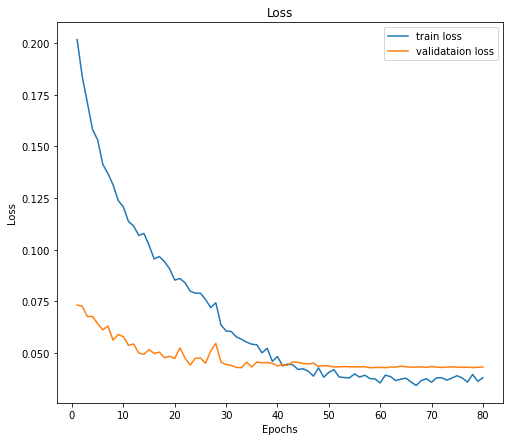

In [ ]:
plot_loss(epochs, hist)

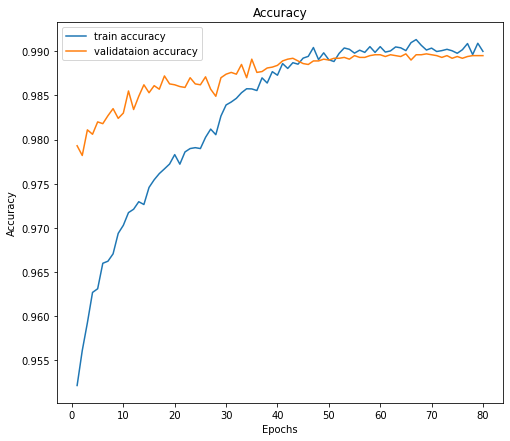

In [ ]:
plot_accuracy(epochs, hist)